### 1. Importing packages

In [ ]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns 
import matplotlib.pyplot as plt

### 2. Loading data

In [ ]:
df= web.get_data_yahoo('SPY', start= '2000-01-01', end='2020-12-31')
df=df[['Open','High','Low', 'Adj Close']]

### 3. Detecting regimes

In [ ]:
regime_detector = mix.GaussianMixture(n_components=4, 
                            covariance_type="spherical", 
                            n_init=100, 
                            random_state=14)

In [ ]:
regime_detector.fit(np.reshape(df, (-1, df.shape[1])))
regime = regime_detector.predict(np.reshape(df, (-1, df.shape[1])))

In [ ]:
df['Return']= np.log(df['Adj Close'] / df['Adj Close'].shift(1))

In [ ]:
regimes = pd.DataFrame(regime, columns=['Regime'],index=df.index)
regimes = regimes.join(df, how='inner')
regimes['Cumulative Return of U.S. Market'] = df.Return.cumsum()
regimes = regimes.reset_index(drop=False)
regimes = regimes.rename(columns={'index':'Date'})
regimes = regimes.iloc[1:, ]

In [ ]:
regimes.head()

,Date,Regime,Open,High,Low,Adj Close,Return,Cumulative Return of U.S. Market
1,2000-01-04,0,143.53125,144.06250,139.640625,94.000107,-0.039891,-0.039891
2,2000-01-05,0,139.93750,141.53125,137.250000,94.168259,0.001787,-0.038104
3,2000-01-06,0,139.62500,141.50000,137.750000,92.654861,-0.016202,-0.054306
4,2000-01-07,0,140.31250,145.75000,140.062500,98.035896,0.056452,0.002147
5,2000-01-10,0,146.25000,146.90625,145.031250,98.372215,0.003425,0.005571


### 4. Plotting and analyzing regimes

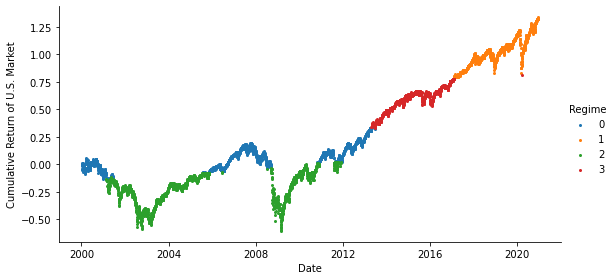

In [ ]:
order=[0, 1, 2, 3]
fig = sns.FacetGrid(data= regimes,hue = 'Regime',hue_order = order,aspect = 2,height = 4)
fig.map(plt.scatter,'Date', 'Cumulative Return of U.S. Market', s=4).add_legend()
plt.show()

In [ ]:
for i in order:
    mean = round(regime_detector.means_[i][0], 4)
    cov = round(regime_detector.covariances_[i], 4)
    print('- Mean for Regime %i: '%i,mean)
    print('> Covariance for Regime %i: '%i, cov)

- Mean for Regime 0:  137.588
> Covariance for Regime 0:  89.8152
- Mean for Regime 1:  284.536
> Covariance for Regime 1:  1148.444
- Mean for Regime 2:  106.8233
> Covariance for Regime 2:  142.6364
- Mean for Regime 3:  197.8583
> Covariance for Regime 3:  298.8475
